<h1>Final Capstone Project - Analyze and Cluster Neighborhoods in British Columbia </h1>

## Table of contents
* [Introduction and Project Proposal](#introduction)
* [Obtaining and cleaning data](#data)
* [Methodology](#methodology)
* [Analyze each neighborhood](#analysis)
* [Cluster Neighborhoods](#cluster)
* [Results and Conclusion](#results)



## Introduction and Project Proposal <a name="introduction"></a>

In this project, we take leverage of the Foursquare API to find the most popular places in each of the neighborhoods consisting of British Columbia. A place is marked as “happening” by the Foursquare API according to the number of people present at a given place and hence the place is updated in real-time; it might change every few minutes. We then cluster the neighborhoods based upon their preferred places in the surrounding area. This will give a clear picture of the aura or the vibe of the place, which can help an individual know what to expect in the neighborhood, and hence decide upon a suitable location according to their preference.



## Obtaining and cleaning data <a name="data"></a>


#### In this module, we can obtain data from various sources and clean them to match our required data frame needed for further processing. Two such methods of obtaining our required data has been explained below.


### First method to acquire the dataset needed:


#### In this method, we scrape the data frame needed from the wikipedia page from the given url and clean the table for better readability. Once we obtain the location data, we pass the address through the geocoder package of the geopy library to extract the latitude and longitude values for each address. Hence, this will give us the complete data set needed for the methodology.


#### We start with importing and downloading the necessary libraries.


In [2]:
import pandas as pd
import numpy as np
import requests
!conda install -c conda-forge lxml --yes 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.33             |       h7d1a2b0_0         426 KB
    lxml-3.8.0                 |           py36_0         3.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               conda-forge/linux-64::lxml-3.8.0-py36_0



lxml-3.8.0           | 3.8 MB    | ##################################### | 100% 
libxslt-1.1.33       | 426 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
!conda install -c conda-forge html5lib --yes 
!conda install -c conda-forge geocoder --yes 

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    future-0.18.2              |   py36h9f0ad1d_1         714 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    request


#### Next, we scrape the table given on this wikipedia page using the read_html method of the pandas library. This table consists of the postal code along with the neighborhood for each location.


In [4]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V"
df = pd.read_html(url, header=0)
df= df[0]
df.head()

,V1AKimberley,V2APenticton,V3ALangley Township(Langley City),V4ASurreySouthwest,V5ABurnaby(Government Road / Lake City / SFU / Burnaby Mountain),V6AVancouver(Strathcona / Chinatown / Downtown Eastside),V7ARichmondSouth,V8APowell River,V9AVictoria(Vic West / Esquimalt)Canadian Forces(MARPAC)
0,V1BVernonEast,V2BKamloopsNorthwest,V3BPort CoquitlamCentral,V4BWhite Rock,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott),V6BVancouver(NE Downtown / Gastown / Harbour C...,V7BRichmond(Sea Island / YVR),V8BSquamish,V9BVictoria(West Highlands / North Langford / ...
1,V1CCranbrook,V2CKamloopsCentral and Southeast,V3CPort CoquitlamSouth,V4CDeltaNortheast,V5CBurnaby(Burnaby Heights / Willingdon Height...,V6CVancouver(Waterfront / Coal Harbour / Canad...,V7CRichmondNorthwest,V8CKitimat,V9CVictoria(Colwood / South Langford / Metchosin)
2,V1ESalmon Arm,V2EKamloopsSouth and West,V3ECoquitlamNorth,V4EDeltaEast,V5EBurnaby(Lakeview-Mayfield / Richmond Park /...,V6EVancouver(SE West End / Davie Village),V7ERichmondSouthwest,V8EWhistler,V9EVictoria(East Highlands / NW Saanich)
3,V1GDawson Creek,V2GWilliams Lake,V3GAbbotsfordEast,V4GDeltaEast Central,V5GBurnaby(Cascade-Schou / Douglas-Gilpin),V6GVancouver(NW West End / Stanley Park),V7GNorth Vancouver (district municipality)Oute...,V8GTerrace,V9GLadysmith
4,V1HVernonWest,V2HKamloopsNorth,V3HPort Moody,V4HNot assigned,V5HBurnaby(Maywood / Marlborough / Oakalla / W...,V6HVancouver(West Fairview / Granville Island ...,V7HNorth Vancouver (district municipality)Inne...,V8HNot assigned,V9HCampbell RiverOutskirts



#### As we see, the table scraped isn't very readable. Hence, we convert the table to a list and iterate through each value to separate the postal codes and neighborhood values, and store them in a data frame.


In [5]:
list_var = df.values.tolist()

In [6]:
postal_code = []
neighborhood = []
for i in list_var:
    for j in i:
        postal_code.append(j[0:3])
        j = j[3:]
        neigh = j.split("(")[0]
        neighborhood.append(neigh)

In [7]:
df = pd.DataFrame({'Postal Codes':postal_code,'Neighborhood':neighborhood})
df.head()

,Postal Codes,Neighborhood
0,V1B,VernonEast
1,V2B,KamloopsNorthwest
2,V3B,Port CoquitlamCentral
3,V4B,White Rock
4,V5B,Burnaby


In [8]:
remove = df[df['Neighborhood']=='Not assigned'].index
print(remove)
df.drop(remove,axis=0, inplace=True)
df.reset_index(inplace=True)
print(df.shape)
df.head()

Int64Index([39, 43, 48, 92, 156, 168], dtype='int64')
(165, 3)


,index,Postal Codes,Neighborhood
0,0,V1B,VernonEast
1,1,V2B,KamloopsNorthwest
2,2,V3B,Port CoquitlamCentral
3,3,V4B,White Rock
4,4,V5B,Burnaby


In [9]:
df.drop(['index'], axis=1, inplace=True)
print(df.shape)
df.head()

(165, 2)


,Postal Codes,Neighborhood
0,V1B,VernonEast
1,V2B,KamloopsNorthwest
2,V3B,Port CoquitlamCentral
3,V4B,White Rock
4,V5B,Burnaby



#### Now that we have the address for each location, we install and import the libraries necessary for leveraging the geocoder package.


In [10]:
!conda install -c conda-forge geopy --yes 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 


#### Using geocoder, we pass the location for each neighborhood and obtain its latitude and longitude values.


In [11]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="My_App")
from geopy.extra.rate_limiter import RateLimiter
obj = RateLimiter(geolocator.geocode, min_delay_seconds=1)
lat=[]
long=[]
for i in neighborhood:
    location = obj("'"+i+"'', Canada")
    if location == None:
        lat.append("None")
        long.append("None")
    else:
        lat.append(str(location.latitude))
        long.append(str(location.longitude))

In [12]:
print(lat.count('None'))
print(long.count('None'))

79
79


In [13]:
from collections import Counter
Counter(lat).keys()

dict_keys(['None', '49.0235357', '49.2433804', '49.2608724', '49.163168', '49.6980743', '48.4283182', '49.5107477', '54.0535577', '50.7005059', '50.1171903', '55.7605306', '52.129081', '49.3207133', '54.5172715', '48.9936579', '49.2822243', '56.2524039', '52.9794279', '54.3126572', '50.111704', '48.8296672', '49.3479861', '49.494891', '48.6505788', '48.7786872', '48.5946782', '49.6727575', '49.316171', '49.3179514', '49.099049', '49.857464', '49.1637594', '52.966077', '49.2207623', '49.2343668', '48.3825724'])

In [14]:
Counter(long).keys()

dict_keys(['None', '-122.7979246', '-122.9725459', '-123.1139529', '-123.137414', '-123.1558612', '-123.3649533', '-115.7672772', '-128.6540519', '-119.2790529', '-122.9543022', '-120.2364453', '-122.1397346', '-123.0737831', '-128.5995482', '-123.8157964', '-122.8293424', '-120.846943', '-122.4936273', '-130.32549', '-120.7884227', '-123.51516139891447', '-124.4439409', '-117.290039', '-123.3983246', '-123.7080446', '-123.4207265', '-124.9276204', '-117.663574', '-124.3117397', '-117.713013', '-119.580688', '-123.9379719', '-114.4216167', '-122.6901534', '-124.8056517', '-123.7315177'])


#### Hence, we extract the coordinate values and can now store it in the data frame to obtain the required dataset. This completes our first method of obtaining the required dataset.


### Second method to acquire the dataset needed:


#### In this method, we scrape the table consisting of the postal code, the neighborhood name, and the coordinate values from a website url given below. Next, we separately extract the coordinate values and the address values via a temporary table, clean them individually and merge them in a single data frame again to obtain our required dataset.


In [15]:
url = "https://www.geonames.org/postal-codes/CA/BC/british-columbia.html"
df = pd.read_html(url, header=0)

In [16]:
print(df[2].shape)
df[2].head()

(385, 7)


,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,NaN,NaN
1,NaN,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,NaN,NaN
3,NaN,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,NaN,NaN



#### As we see the table scraped from this website, is much more readable but also contains garbage values. Hence we initially clean the table by dropping unnecessary columns and indexes.


In [17]:
df1 = df[2]

In [18]:
remove = df1[df1['Unnamed: 0']=='NaN'].index
df1.drop(remove,axis=0, inplace=True)
print(df1.shape)
df1.head()

(385, 7)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,NaN,NaN
1,NaN,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,NaN,NaN
3,NaN,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,NaN,NaN


In [19]:
df1.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df1.head()

,index,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,NaN,NaN
1,NaN,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,NaN,NaN
3,NaN,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,NaN,NaN



#### Now, we see that each row is followed by a row consisting of its coordinates. Hence extract the alternate rows and store the address data of each neighborhood in a temporary data frame and remove the null values.


In [20]:
df2 = df1.iloc[::2]
df2.head()

,index,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,NaN,NaN
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,NaN,NaN
4,3.0,White Rock,V4B,Canada,British Columbia,NaN,NaN
6,4.0,Penticton,V2A,Canada,British Columbia,NaN,NaN
8,5.0,Westbank,V4T,Canada,British Columbia,NaN,NaN


In [20]:
df2.drop(['Admin2', 'Admin3'], axis=1, inplace=True)
print(df2.shape)
df2.tail()

(193, 5)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,Place,Code,Country,Admin1
376,189.0,Vancouver (NE Downtown / Harbour Centre / Gast...,V6B,Canada,British Columbia
378,190.0,Richmond South,V7A,Canada,British Columbia
380,191.0,Duncan,V9L,Canada,British Columbia
382,192.0,Parksville,V9P,Canada,British Columbia
384,NaN,NaN,NaN,NaN,NaN


In [22]:
df2.dropna(subset = ["index"], inplace=True)
print(df2.shape)
df2.tail()

(192, 5)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Place,Code,Country,Admin1
374,188.0,Vancouver (Strathcona / Chinatown / Downtown E...,V6A,Canada,British Columbia
376,189.0,Vancouver (NE Downtown / Harbour Centre / Gast...,V6B,Canada,British Columbia
378,190.0,Richmond South,V7A,Canada,British Columbia
380,191.0,Duncan,V9L,Canada,British Columbia
382,192.0,Parksville,V9P,Canada,British Columbia



#### In the main data frame, we are left with the coordinate values corresponding to each address in the temp data frame. All the cells of the row contain the same coordinate values given by latitude/longitude. Hence we drop all duplicate column, rename the column name as 'Coordinates', and merge the address values from the temporary data frame to the main data frame.


In [23]:
j=1.0
for i in range(df1.shape[0]):
    remove = df1[df1["index"]==j].index
    df1.drop(remove, axis=0, inplace=True)
    j+=1.0

In [24]:
df1.tail()

,index,Place,Code,Country,Admin1,Admin2,Admin3
377,NaN,49.279/-123.114,49.279/-123.114,49.279/-123.114,49.279/-123.114,49.279/-123.114,49.279/-123.114
379,NaN,49.12/-123.117,49.12/-123.117,49.12/-123.117,49.12/-123.117,49.12/-123.117,49.12/-123.117
381,NaN,48.783/-123.703,48.783/-123.703,48.783/-123.703,48.783/-123.703,48.783/-123.703,48.783/-123.703
383,NaN,49.316/-124.319,49.316/-124.319,49.316/-124.319,49.316/-124.319,49.316/-124.319,49.316/-124.319
384,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df1.dropna(subset = ["Place"], inplace=True)
print(df1.shape)
df1.tail()

(192, 7)


,index,Place,Code,Country,Admin1,Admin2,Admin3
375,NaN,49.278/-123.091,49.278/-123.091,49.278/-123.091,49.278/-123.091,49.278/-123.091,49.278/-123.091
377,NaN,49.279/-123.114,49.279/-123.114,49.279/-123.114,49.279/-123.114,49.279/-123.114,49.279/-123.114
379,NaN,49.12/-123.117,49.12/-123.117,49.12/-123.117,49.12/-123.117,49.12/-123.117,49.12/-123.117
381,NaN,48.783/-123.703,48.783/-123.703,48.783/-123.703,48.783/-123.703,48.783/-123.703,48.783/-123.703
383,NaN,49.316/-124.319,49.316/-124.319,49.316/-124.319,49.316/-124.319,49.316/-124.319,49.316/-124.319


In [26]:
df1.drop(['index','Code','Country','Admin1','Admin2','Admin3'], axis=1, inplace=True)
print(df1.shape)
df1.head()

(192, 1)


,Place
1,49.323/-122.863
3,49.221/-122.69
5,49.026/-122.806
7,49.481/-119.586
9,49.866/-119.739


In [27]:
df1.rename(columns={'Place':'Coordinates'}, inplace=True)
df1.head()

,Coordinates
1,49.323/-122.863
3,49.221/-122.69
5,49.026/-122.806
7,49.481/-119.586
9,49.866/-119.739


In [28]:
df1.reset_index(inplace = True, drop = True) 
df2.reset_index(inplace = True, drop = True) 

In [29]:
df1["Place"]=df2[["Place"]]
df1.head()

,Coordinates,Place
0,49.323/-122.863,Port Moody
1,49.221/-122.69,Pitt Meadows
2,49.026/-122.806,White Rock
3,49.481/-119.586,Penticton
4,49.866/-119.739,Westbank


In [30]:
df2.head()

,index,Place,Code,Country,Admin1
0,1.0,Port Moody,V3H,Canada,British Columbia
1,2.0,Pitt Meadows,V3Y,Canada,British Columbia
2,3.0,White Rock,V4B,Canada,British Columbia
3,4.0,Penticton,V2A,Canada,British Columbia
4,5.0,Westbank,V4T,Canada,British Columbia


In [31]:
df1["Code"]=df2[["Code"]]
df1["Country"]=df2[["Country"]]
df1["Admin1"]=df2[["Admin1"]]
df1.head()

,Coordinates,Place,Code,Country,Admin1
0,49.323/-122.863,Port Moody,V3H,Canada,British Columbia
1,49.221/-122.69,Pitt Meadows,V3Y,Canada,British Columbia
2,49.026/-122.806,White Rock,V4B,Canada,British Columbia
3,49.481/-119.586,Penticton,V2A,Canada,British Columbia
4,49.866/-119.739,Westbank,V4T,Canada,British Columbia



#### Now, we have obtained all the required data in one data frame. Upon checking the data types of each column, we find that that the coordinate values are in the 'string' data type,. Hence to use them in further processing, we split the values into latitude and longitude values, store them separately in the data frame and convert them to the float data type.


In [32]:
coordinates = df1[["Coordinates"]].values.tolist()

In [33]:
lat=[]
long=[]
for i in range(len(coordinates)):
    coord = coordinates[i][0].split("/")
    lat.append(coord[0])
    long.append(coord[1])

In [34]:
df1["Latitude"] = lat
df1["Longitude"] = long

In [35]:
df1.rename(columns={'Admin1':'Province'}, inplace=True)

In [36]:
df1.head()

,Coordinates,Place,Code,Country,Province,Latitude,Longitude
0,49.323/-122.863,Port Moody,V3H,Canada,British Columbia,49.323,-122.863
1,49.221/-122.69,Pitt Meadows,V3Y,Canada,British Columbia,49.221,-122.69
2,49.026/-122.806,White Rock,V4B,Canada,British Columbia,49.026,-122.806
3,49.481/-119.586,Penticton,V2A,Canada,British Columbia,49.481,-119.586
4,49.866/-119.739,Westbank,V4T,Canada,British Columbia,49.866,-119.739


In [37]:
df1[['Latitude','Longitude']] = df1[['Latitude','Longitude']].astype(np.float16) 

In [38]:
print(df1.shape)
df1.dtypes

(192, 7)


Coordinates     object
Place           object
Code            object
Country         object
Province        object
Latitude       float16
Longitude      float16
dtype: object


#### We also notice that several different locations inside the same cities having different postal codes have been included in our dataset. Under the assumption that the popular places that we aim to explore in each city will be similar, we remove redundant city values from our data frame. For example, if we have Vancouver East and Vancouver West in our data frame, then we remove the 'East' and the 'West' part and combine them into one 'Vancouver.


In [39]:
place = df1['Place'].tolist()

In [40]:
new_place = []
for i in place:
    new_place.append(i.split(" (")[0])

In [41]:
df1['Place'] = new_place

In [73]:
aggregation_functions = {'Code': 'first', 'Country': 'first', 'Province': 'first', 'Latitude' : 'mean', 'Longitude' : 'mean'}
df_new = df1.groupby(df1['Place']).aggregate(aggregation_functions)

In [74]:
print(df_new.shape)
df_new.reset_index(inplace=True)

(155, 5)


In [75]:
df_new

,Place,Code,Country,Province,Latitude,Longitude
0,Abbotsford East,V3G,Canada,British Columbia,49.06250,-122.1875
1,Abbotsford Southeast,V2S,Canada,British Columbia,49.03125,-122.3125
2,Abbotsford Southwest,V2T,Canada,British Columbia,49.03125,-122.3750
3,Abbotsford West,V4X,Canada,British Columbia,49.09375,-122.3750
4,Atlin Region,V0W,Canada,British Columbia,59.62500,-133.5000
...,...,...,...,...,...,...
150,Westbank,V4T,Canada,British Columbia,49.87500,-119.7500
151,Whistler,V8E,Canada,British Columbia,50.12500,-122.9375
152,White Rock,V4B,Canada,British Columbia,49.03125,-122.8125
153,Williams Lake,V2G,Canada,British Columbia,52.15625,-122.1250


In [80]:
place1 = df_new['Place'].tolist()

In [81]:
new_place1 = []
for i in place1:
    new_place1.append(i.split(" ")[0])

In [82]:
df_new['Distinct place'] = new_place1

In [83]:
aggregation_functions = {'Place' : 'first' ,'Code': 'first', 'Country': 'first', 'Province': 'first', 'Latitude' : 'mean', 'Longitude' : 'mean'}
df_new = df_new.groupby(df_new['Distinct place']).aggregate(aggregation_functions)

In [84]:
modified_places = df_new['Place'].tolist()
for index, word in enumerate(modified_places):
    if " North Island, Sunshine Coast" in word:
        pass
    elif " Westminster" in word:
        pass
    elif " Northern" in word:
        pass
    elif " West Okanagan" in word:
        pass
    elif " East" in word:
        modified_places[index]=modified_places[index].replace(" East","")
    elif " West" in word:
        modified_places[index]=modified_places[index].replace(" West","")
    elif " Southeast" in word:
        modified_places[index]=modified_places[index].replace(" Southeast","")
    elif " Northeast" in word:
        modified_places[index]=modified_places[index].replace(" Northeast","")
    elif " North" in word:
        modified_places[index]=modified_places[index].replace(" North","")
    elif " South" in word:
        modified_places[index]=modified_places[index].replace(" South","")
modified_places

['Abbotsford',
 'Atlin Region',
 'Burnaby',
 'Campbell River Central',
 'Cariboo and West Okanagan',
 'Castlegar',
 'Cedar',
 'Central Island',
 'Chilcotin',
 'Chilliwack Central',
 'Comox',
 'Coquitlam',
 'Courtenay Central',
 'Cranbrook',
 'Dawson Creek',
 'Delta Central',
 'Duncan',
 'East Kootenays',
 'Esquimalt',
 'Fort St. John',
 'Harrison Lake Region',
 'Highlands',
 'Inside Passage and the Queen Charlottes',
 'Juan de Fuca Shore',
 'Kamloops Central and',
 'Kelowna Central',
 'Kimberley',
 'Kitimat',
 'Ladysmith',
 'Langley City',
 'Lower Skeena',
 'Maple Ridge',
 'Merritt',
 'Metchosin',
 'Mission',
 'Nanaimo Central',
 'Nelson',
 'New Westminster Northeast',
 'North Central Island and Bute Inlet Region',
 'Northern British Columbia',
 'Oak Bay',
 'Omineca and Yellowhead',
 'Parksville',
 'Penticton',
 'Pitt Meadows',
 'Port Alberni',
 'Powell River',
 'Prince George Central',
 'Qualicum Beach',
 'Quesnel',
 'Richmond',
 'Saanich Central',
 'Salmon Arm',
 'Saltspring Island',

In [85]:
df_new['Place'] = modified_places

In [86]:
df_new.at[38, 'Place'] = "North Island, Sunshine Coast"

In [89]:
print(df_new.shape)
df_new.reset_index(inplace=True)

(73, 6)


In [90]:
df_new.drop(['Distinct place'], axis=1, inplace=True)

In [92]:
pd.set_option('display.max_rows', df_new.shape[0]+1)

In [94]:
df_new.dropna(subset = ["Code"], inplace=True)
print(df_new.shape)
df_new

(72, 6)


,Place,Code,Country,Province,Latitude,Longitude
0,Abbotsford,V3G,Canada,British Columbia,49.06250,-122.3125
1,Atlin Region,V0W,Canada,British Columbia,59.62500,-133.5000
2,Burnaby,V3N,Canada,British Columbia,49.25000,-123.0000
3,Campbell River Central,V9W,Canada,British Columbia,50.00000,-125.5625
4,Cariboo and West Okanagan,V0K,Canada,British Columbia,51.43750,-121.6250
5,Castlegar,V1N,Canada,British Columbia,49.31250,-117.6875
6,Cedar,V9X,Canada,British Columbia,49.03125,-124.0000
7,Central Island,V0R,Canada,British Columbia,49.68750,-122.5000
8,Chilcotin,V0L,Canada,British Columbia,52.09375,-123.6250
9,Chilliwack Central,V2P,Canada,British Columbia,49.12500,-121.8125



#### Hence, after all the necessary cleaning and preprocessing, we obtain the final data frame with 72 addresses and their latitude and longitude values. This completes our second method of obtaining data.



## Methodology <a name="methodology"></a>



#### In the methodology section, we begin with outlining a map of British Columbia and mark all the neighborhoods from our data frame onto the map. For this purpose, we utilize the visualization libraries and hence our first step would be to install and import them. We also import the KMeans package for clustering from the Sklearn library for later use.


In [46]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import json # library to handle JSON files

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.4               |   py36h830a2c2_0        10.1 MB  conda-forge
    toolz-0.10.0               |             py_0          46 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
             


#### We obtain the coordinates for the British Columbia province using the geocoder package, as we did before in the data section.


In [47]:
address = 'British Columbia, CA'

N_obj = Nominatim(user_agent='british_columbia_explorer')
geo_obj = N_obj.geocode(address)
lat = geo_obj.latitude
long = geo_obj.longitude
print("The lat long values for British Columbia are: {}, {}".format(lat,long))

The lat long values for British Columbia are: 55.001251, -125.002441



#### Using the Folium library, we map the neighborhood coordinates onto the main British Columbia map.


In [95]:
map_bc = folium.Map(location=[lat, long], zoom_start=5)
print("{} , {}".format(lat,long))
for lati, lng, label in zip(df_new['Latitude'], df_new['Longitude'], df_new['Place']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lati, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bc)
    
map_bc

55.001251 , -125.002441



#### We leverage the Foursquare API to explore the nearby locations of each neighborhood. To do so, we first define our Foursqaure credentials and version.


In [49]:
CLIENT_ID = 'QIQC42VYJTUBVEV1B0DBVBEFM4TR2YKVTUJOI21ELHIIIFLP' # your Foursquare ID
CLIENT_SECRET = 'ZXKAIHJSAPDYD1X5YUOJE0GIMO3C3O5DVG41FXGPT2JEUQCI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QIQC42VYJTUBVEV1B0DBVBEFM4TR2YKVTUJOI21ELHIIIFLP
CLIENT_SECRET:ZXKAIHJSAPDYD1X5YUOJE0GIMO3C3O5DVG41FXGPT2JEUQCI



#### We also combine the entire process of creating the url request for each location, extracting the locations from the response file and storing them into a data frame, into a function named as 'getNearbyVenues'. 


In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    #print(venues_list)
    nearby_venues = pd.DataFrame([item for var in venues_list for item in var])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude',
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


#### Call the function using values from our data frame.


In [96]:
neighborhood_venues = getNearbyVenues(names=df_new['Place'],
                                   latitudes=df_new['Latitude'],
                                   longitudes=df_new['Longitude']
                                  )

Abbotsford
Atlin Region
Burnaby
Campbell River Central
Cariboo and West Okanagan
Castlegar
Cedar
Central Island
Chilcotin
Chilliwack Central
Comox
Coquitlam
Courtenay Central
Cranbrook
Dawson Creek
Delta Central
Duncan
East Kootenays
Esquimalt
Fort St. John
Harrison Lake Region
Highlands
Inside Passage and the Queen Charlottes
Juan de Fuca Shore
Kamloops Central and
Kelowna Central
Kimberley
Kitimat
Ladysmith
Langley City
Lower Skeena
Maple Ridge
Merritt
Metchosin
Mission
Nanaimo Central
Nelson
New Westminster Northeast
North Central Island and Bute Inlet Region
Northern British Columbia
Oak Bay
Omineca and Yellowhead
Parksville
Penticton
Pitt Meadows
Port Alberni
Powell River
Prince George Central
Qualicum Beach
Quesnel
Richmond
Saanich Central
Salmon Arm
Saltspring Island
Sidney
Similkameen
Sooke
South Okanagan
Squamish
Surrey
Terrace
Trail
Upper Columbia Region
Vancouver
Vernon Central
Victoria Central British Columbia Provincial Government
West Kootenays
Westbank
Whistler
White Roc


#### Checking the size of the resulting data frame.


In [97]:
print(neighborhood_venues.shape)
neighborhood_venues.head()

(145, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsford,49.0625,-122.3125,Discovery Trail,49.060245,-122.315565,Trail
1,Abbotsford,49.0625,-122.3125,Grandmas Market Gladwin Rd,49.066149,-122.313659,Grocery Store
2,Burnaby,49.2500,-123.0000,BCITSA's Stand Central SE2,49.251424,-123.001384,Snack Place
3,Burnaby,49.2500,-123.0000,BCIT Bookstore,49.251548,-123.001364,Bookstore
4,Burnaby,49.2500,-123.0000,The Rix @ BCIT,49.251153,-123.000636,Coffee Shop



#### Checking how many venues were returned for each neighborhood.


In [98]:
neighborhood_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbotsford,2,2,2,2,2,2
Burnaby,9,9,9,9,9,9
Comox,6,6,6,6,6,6
Coquitlam,5,5,5,5,5,5
Cranbrook,1,1,1,1,1,1
Duncan,3,3,3,3,3,3
Esquimalt,1,1,1,1,1,1
Fort St. John,2,2,2,2,2,2
Highlands,4,4,4,4,4,4



#### Unique categories all over British Columbia.


In [99]:
print('There are {} uniques categories.'.format(len(neighborhood_venues['Venue Category'].unique())))

There are 76 uniques categories.




## Analyze each neighborhood <a name="analysis"></a>


#### We analyze the nearby locations of each neighborhood using the one hot encoding technique.


In [134]:
one_hot = pd.get_dummies(neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")
print(one_hot.shape)
one_hot.head()

(145, 76)


,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bank,Baseball Field,Beach,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Garden,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hot Dog Joint,Hotel,Indian Restaurant,Juice Bar,Korean Restaurant,Lake,Liquor Store,Malay Restaurant,Men's Store,Motorcycle Shop,Mountain,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Recreation Center,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Ski Area,Ski Lodge,Snack Place,Sporting Goods Shop,Sushi Restaurant,Theme Park,Tourist Information Center,Toy / Game Store,Trail,Vacation Rental,Vietnamese Restaurant,Wine Shop,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
pd.set_option('display.max_columns', one_hot.shape[1]+1)

In [136]:
one_hot

,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bank,Baseball Field,Beach,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Garden,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hot Dog Joint,Hotel,Indian Restaurant,Juice Bar,Korean Restaurant,Lake,Liquor Store,Malay Restaurant,Men's Store,Motorcycle Shop,Mountain,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Recreation Center,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Ski Area,Ski Lodge,Snack Place,Sporting Goods Shop,Sushi Restaurant,Theme Park,Tourist Information Center,Toy / Game Store,Trail,Vacation Rental,Vietnamese Restaurant,Wine Shop,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



#### Add neighborhood values corresponding to their nearby locations.


In [138]:
one_hot['Neighborhood'] = neighborhood_venues['Neighborhood'] 
one_hot.head()

,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bank,Baseball Field,Beach,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Garden,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hot Dog Joint,Hotel,Indian Restaurant,Juice Bar,Korean Restaurant,Lake,Liquor Store,Malay Restaurant,Men's Store,Motorcycle Shop,Mountain,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Recreation Center,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Ski Area,Ski Lodge,Snack Place,Sporting Goods Shop,Sushi Restaurant,Theme Park,Tourist Information Center,Toy / Game Store,Trail,Vacation Rental,Vietnamese Restaurant,Wine Shop,Zoo,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Abbotsford
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Abbotsford
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Burnaby
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Burnaby
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Burnaby


In [139]:
fixed_columns = [one_hot.columns[-1]] + list(one_hot.columns[:-1])
one_hot = one_hot[fixed_columns]
one_hot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bank,Baseball Field,Beach,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Garden,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hot Dog Joint,Hotel,Indian Restaurant,Juice Bar,Korean Restaurant,Lake,Liquor Store,Malay Restaurant,Men's Store,Motorcycle Shop,Mountain,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Recreation Center,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Ski Area,Ski Lodge,Snack Place,Sporting Goods Shop,Sushi Restaurant,Theme Park,Tourist Information Center,Toy / Game Store,Trail,Vacation Rental,Vietnamese Restaurant,Wine Shop,Zoo
0,Abbotsford,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Abbotsford,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Burnaby,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Burnaby,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Burnaby,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



#### Checking the size of our new data frame.


In [140]:
one_hot.shape

(145, 77)


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.


In [141]:
british_columbia_grouped = one_hot.groupby('Neighborhood').mean().reset_index()
british_columbia_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bank,Baseball Field,Beach,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Garden,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hot Dog Joint,Hotel,Indian Restaurant,Juice Bar,Korean Restaurant,Lake,Liquor Store,Malay Restaurant,Men's Store,Motorcycle Shop,Mountain,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Recreation Center,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Ski Area,Ski Lodge,Snack Place,Sporting Goods Shop,Sushi Restaurant,Theme Park,Tourist Information Center,Toy / Game Store,Trail,Vacation Rental,Vietnamese Restaurant,Wine Shop,Zoo
0,Abbotsford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
1,Burnaby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.111111,0.111111,0.222222,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Comox,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Coquitlam,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.200000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cranbrook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
british_columbia_grouped.shape

(32, 77)


#### We define a function to sort the venues in descending order.


In [143]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


#### Now we create the new data frame and display the top 10 venues for each neighborhood.


In [147]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(10):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neigh_top_venues = pd.DataFrame(columns=columns)
neigh_top_venues['Neighborhood'] = british_columbia_grouped['Neighborhood']

for ind in np.arange(british_columbia_grouped.shape[0]):
    neigh_top_venues.iloc[ind, 1:] = return_most_common_venues(british_columbia_grouped.iloc[ind, :], 10)

neigh_top_venues

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,Grocery Store,Trail,Falafel Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School
1,Burnaby,Bus Stop,Bookstore,Snack Place,Park,Bus Station,Burger Joint,Sandwich Place,Coffee Shop,Fast Food Restaurant,Falafel Restaurant
2,Comox,Fast Food Restaurant,Coffee Shop,Pharmacy,Sandwich Place,Juice Bar,Elementary School,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant
3,Coquitlam,Asian Restaurant,Convenience Store,Golf Course,Gas Station,Coffee Shop,Zoo,Falafel Restaurant,Dessert Shop,Dim Sum Restaurant,Dog Run
4,Cranbrook,Construction & Landscaping,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop
5,Duncan,Convenience Store,Gas Station,Dog Run,Zoo,Fast Food Restaurant,Construction & Landscaping,Dessert Shop,Dim Sum Restaurant,Elementary School,Falafel Restaurant
6,Esquimalt,Boat or Ferry,Fish & Chips Shop,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant,Zoo
7,Fort St. John,American Restaurant,Gas Station,Fast Food Restaurant,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant
8,Highlands,Zoo,Theme Park,Boat or Ferry,Wine Shop,Auto Workshop,Fish & Chips Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School
9,Kelowna Central,Park,Mountain,Zoo,Falafel Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Fast Food Restaurant



## Cluster Neighborhoods <a name="cluster"></a>


#### Here, we cluster the neighborhoods using the k-means clustering based on similar nearby locations. One of the most important factor in K-Means Clustering is to choose the value of 'k', or the number of clusters for th dataset. To decide this, we plot a graph with the 'sum of squared distances' on the y-axis and the 'k' value on the x-axis. Ideally, from this graph, the best 'k' value would be the one with the least sum of squared distance but that usually results in a very high k value. Hence, we apply the elbow method to choose the optimum k value. In the graph, as we increase the value of k, the distance decreases. The point which shows a steep decline in the distance, after which the distance decrease is comparatively less is known as the optimal value of k ( also known as the elbow point ). 


In [176]:
british_columbia_clustering = british_columbia_grouped.drop('Neighborhood', 1)

In [177]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(british_columbia_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [178]:
import matplotlib.pyplot as plt

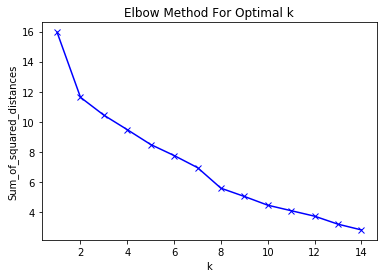

In [179]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


#### In this case, the elbow point is k=8, and we run the run k-means to cluster the neighborhood into 8 clusters.


In [180]:
obj = KMeans(n_clusters=8, random_state=0).fit(british_columbia_clustering)

obj.labels_[0:15] 

array([1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 4, 0, 1, 7], dtype=int32)


#### Now, we create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [187]:
#neigh_top_venues.insert(0, 'Cluster Labels', obj.labels_)
neigh_top_venues['Cluster Labels'] = obj.labels_
neigh_top_venues.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Abbotsford,Grocery Store,Trail,Falafel Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School
1,1,Burnaby,Bus Stop,Bookstore,Snack Place,Park,Bus Station,Burger Joint,Sandwich Place,Coffee Shop,Fast Food Restaurant,Falafel Restaurant
2,1,Comox,Fast Food Restaurant,Coffee Shop,Pharmacy,Sandwich Place,Juice Bar,Elementary School,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant
3,1,Coquitlam,Asian Restaurant,Convenience Store,Golf Course,Gas Station,Coffee Shop,Zoo,Falafel Restaurant,Dessert Shop,Dim Sum Restaurant,Dog Run
4,2,Cranbrook,Construction & Landscaping,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop


In [188]:
clustered_df = df_new
clustered_df = clustered_df.join(neigh_top_venues.set_index('Neighborhood'), on='Place')
clustered_df.head()

,Place,Code,Country,Province,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,V3G,Canada,British Columbia,49.0625,-122.3125,1.0,Grocery Store,Trail,Falafel Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School
1,Atlin Region,V0W,Canada,British Columbia,59.6250,-133.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Burnaby,V3N,Canada,British Columbia,49.2500,-123.0000,1.0,Bus Stop,Bookstore,Snack Place,Park,Bus Station,Burger Joint,Sandwich Place,Coffee Shop,Fast Food Restaurant,Falafel Restaurant
3,Campbell River Central,V9W,Canada,British Columbia,50.0000,-125.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cariboo and West Okanagan,V0K,Canada,British Columbia,51.4375,-121.6250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
clustered_df.dropna(subset = ["Cluster Labels"], inplace=True)
print(df_new.shape)
clustered_df = clustered_df.astype({"Cluster Labels": int})

(72, 6)


In [190]:
clustered_df.reset_index(inplace = True, drop = True)
clustered_df

,Place,Code,Country,Province,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,V3G,Canada,British Columbia,49.06250,-122.3125,1,Grocery Store,Trail,Falafel Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School
1,Burnaby,V3N,Canada,British Columbia,49.25000,-123.0000,1,Bus Stop,Bookstore,Snack Place,Park,Bus Station,Burger Joint,Sandwich Place,Coffee Shop,Fast Food Restaurant,Falafel Restaurant
2,Comox,V9M,Canada,British Columbia,49.68750,-124.9375,1,Fast Food Restaurant,Coffee Shop,Pharmacy,Sandwich Place,Juice Bar,Elementary School,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant
3,Coquitlam,V3J,Canada,British Columbia,49.25000,-122.8750,1,Asian Restaurant,Convenience Store,Golf Course,Gas Station,Coffee Shop,Zoo,Falafel Restaurant,Dessert Shop,Dim Sum Restaurant,Dog Run
4,Cranbrook,V1C,Canada,British Columbia,49.50000,-115.7500,2,Construction & Landscaping,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop
5,Duncan,V9L,Canada,British Columbia,48.78125,-123.6875,1,Convenience Store,Gas Station,Dog Run,Zoo,Fast Food Restaurant,Construction & Landscaping,Dessert Shop,Dim Sum Restaurant,Elementary School,Falafel Restaurant
6,Esquimalt,V9A,Canada,British Columbia,48.43750,-123.4375,3,Boat or Ferry,Fish & Chips Shop,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant,Zoo
7,Fort St. John,V1J,Canada,British Columbia,56.25000,-120.8750,1,American Restaurant,Gas Station,Fast Food Restaurant,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant
8,Highlands,V9B,Canada,British Columbia,48.46875,-123.5000,3,Zoo,Theme Park,Boat or Ferry,Wine Shop,Auto Workshop,Fish & Chips Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School
9,Kelowna Central,V1Y,Canada,British Columbia,49.90625,-119.4375,1,Park,Mountain,Zoo,Falafel Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Fast Food Restaurant


In [191]:
clustered_df['Cluster Labels'].value_counts()

1    20
2     5
3     2
7     1
6     1
5     1
4     1
0     1
Name: Cluster Labels, dtype: int64

In [192]:
print("The clustered neighborhoods of British Columbia are: {} , {}".format(lat,long))

The clustered neighborhoods of British Columbia are: 55.001251 , -125.002441



#### Finally, visualizing the resulting cluster onto the British Columbia map using Folium.


In [204]:
map_bc_neigh = folium.Map(location=[lat,long], zoom_start=5)
map_bc_neigh

x = np.arange(8)
ys = [i + x + (i*x)**2 for i in range(8)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lati, lon, neigh, cluster in zip(clustered_df['Latitude'], clustered_df['Longitude'], clustered_df['Place'], clustered_df['Cluster Labels']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lati, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_bc_neigh)
       
map_bc_neigh



## Results and Conclusion <a name="results"></a>


#### Based on the similarity of neighborhoods based on their nearby venues, we cluster the neighborhoods into 8 different clusters. We examine each cluster and determine the discriminating venue categories that distinguish each cluster.



#### Cluster 1

In [205]:
label0 = clustered_df.loc[clustered_df['Cluster Labels'] == 0,
                          clustered_df.columns[[0] + list(range(7, clustered_df.shape[1]))]]
print(label0.shape)
label0.head().reset_index(drop=True)

(1, 11)


,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Langley City,Baseball Field,Zoo,Fish & Chips Shop,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant



#### Cluster 2

In [206]:
label1 = clustered_df.loc[clustered_df['Cluster Labels'] == 1,
                          clustered_df.columns[[0] + list(range(7, clustered_df.shape[1]))]]
print(label1.shape)
label1.head().reset_index(drop=True)

(20, 11)


,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,Grocery Store,Trail,Falafel Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School
1,Burnaby,Bus Stop,Bookstore,Snack Place,Park,Bus Station,Burger Joint,Sandwich Place,Coffee Shop,Fast Food Restaurant,Falafel Restaurant
2,Comox,Fast Food Restaurant,Coffee Shop,Pharmacy,Sandwich Place,Juice Bar,Elementary School,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant
3,Coquitlam,Asian Restaurant,Convenience Store,Golf Course,Gas Station,Coffee Shop,Zoo,Falafel Restaurant,Dessert Shop,Dim Sum Restaurant,Dog Run
4,Duncan,Convenience Store,Gas Station,Dog Run,Zoo,Fast Food Restaurant,Construction & Landscaping,Dessert Shop,Dim Sum Restaurant,Elementary School,Falafel Restaurant



#### Cluster 3

In [207]:
label2 = clustered_df.loc[clustered_df['Cluster Labels'] == 2,
                          clustered_df.columns[[0] + list(range(7, clustered_df.shape[1]))]]
print(label2.shape)
label2.head().reset_index(drop=True)

(5, 11)


,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cranbrook,Construction & Landscaping,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop
1,Salmon Arm,Construction & Landscaping,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop
2,Sooke,Construction & Landscaping,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop
3,South Okanagan,Construction & Landscaping,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop
4,Terrace,Construction & Landscaping,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop



#### Cluster 4

In [208]:
label3 = clustered_df.loc[clustered_df['Cluster Labels'] == 3,
                          clustered_df.columns[[0] + list(range(7, clustered_df.shape[1]))]]
print(label3.shape)
label3.head().reset_index(drop=True)

(2, 11)


,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Esquimalt,Boat or Ferry,Fish & Chips Shop,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant,Zoo
1,Highlands,Zoo,Theme Park,Boat or Ferry,Wine Shop,Auto Workshop,Fish & Chips Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School



#### Cluster 5

In [209]:
label4 = clustered_df.loc[clustered_df['Cluster Labels'] == 4,
                          clustered_df.columns[[0] + list(range(7, clustered_df.shape[1]))]]
print(label4.shape)
label4.head().reset_index(drop=True)

(1, 11)


,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kitimat,Business Service,Zoo,Fast Food Restaurant,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fish & Chips Shop



#### Cluster 6

In [210]:
label5 = clustered_df.loc[clustered_df['Cluster Labels'] == 5,
                          clustered_df.columns[[0] + list(range(7, clustered_df.shape[1]))]]
print(label5.shape)
label5.head().reset_index(drop=True)

(1, 11)


,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Trail,Pub,Falafel Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Zoo



#### Cluster 7

In [211]:
label6 = clustered_df.loc[clustered_df['Cluster Labels'] == 6,
                          clustered_df.columns[[0] + list(range(7, clustered_df.shape[1]))]]
print(label6.shape)
label6.head().reset_index(drop=True)

(1, 11)


,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Saanich Central,Bank,Zoo,Fish & Chips Shop,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant,Fast Food Restaurant



#### Cluster 8

In [212]:
label7 = clustered_df.loc[clustered_df['Cluster Labels'] == 7,
                          clustered_df.columns[[0] + list(range(7, clustered_df.shape[1]))]]
print(label7.shape)
label7.head().reset_index(drop=True)

(1, 11)


,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Nelson,Trail,Zoo,Fast Food Restaurant,Construction & Landscaping,Convenience Store,Dessert Shop,Dim Sum Restaurant,Dog Run,Elementary School,Falafel Restaurant


#### Thus, these clusters define the type of locality and can be used by different people to choose their preferably area of interest accordingly. For example, the first cluster involves a locality that has baseball fields, zoos in their most popular nearby venues and hence would be ore suitable for a younger generation, preferably kids in their middle schools. On the contrary, the second cluster involves a locality that has grocery shops, fast food shops and convenience stores as their popular nearby locations, and hence these areas would be more suitable for college students, who would need all of these at an almost daily basis.

### This marks the end of the project. Thank you for your time!